In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IND = df_DA_IND.dropna(subset=['salary_year_avg'])

In [22]:
df_DA_IND = df_DA_IND.explode('job_skills')
df_DA_IND['job_skills']
df_DA_IND_grouped = df_DA_IND.groupby(by='job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_IND_grouped.sort_values(by='median',ascending=False).head(10)
df_DA_skills = df_DA_IND_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median',ascending=False).head(10)


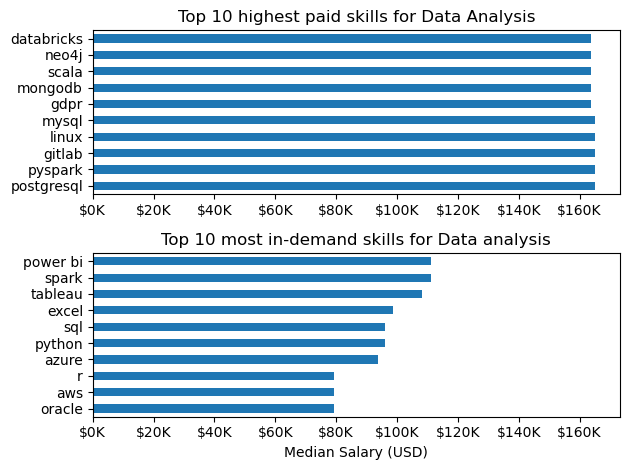

In [38]:
fig, ax = plt.subplots(2,1)
df_DA_top_pay[::-1].plot(kind='barh',y='median', ax=ax[0],legend = False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 highest paid skills for Data Analysis')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

df_DA_skills[::-1].plot(kind='barh',y='median', ax=ax[1],legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 most in-demand skills for Data analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))

fig.tight_layout()